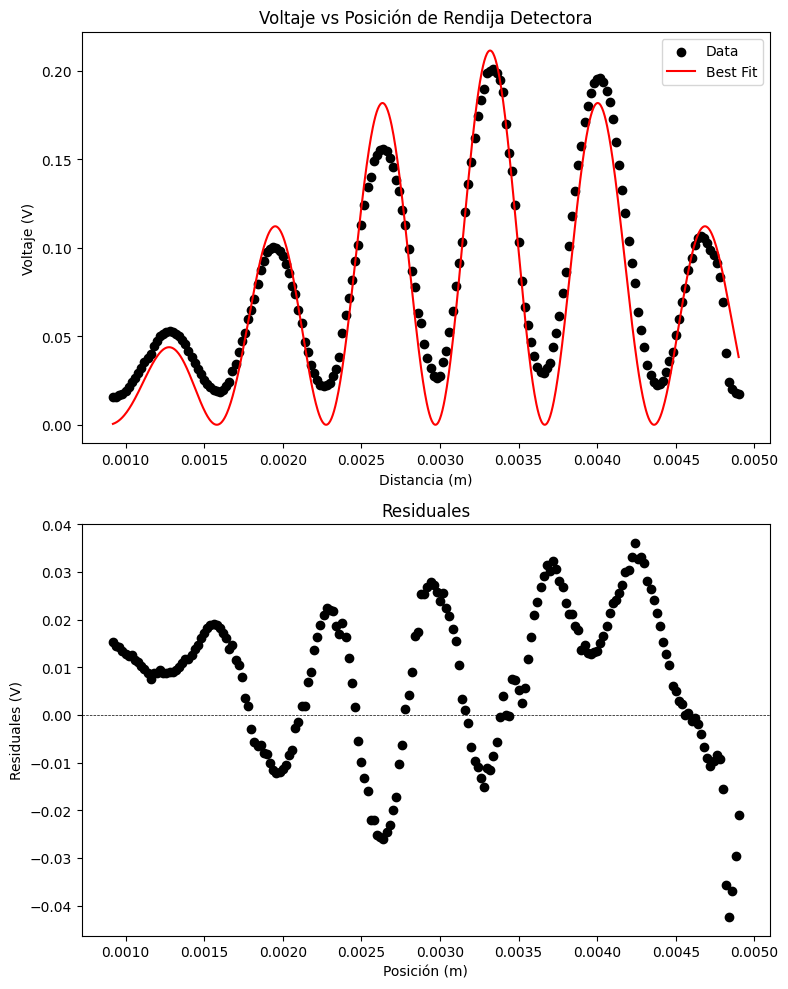

Best fit parameters (A, D, C, x_0): [2.11498962e-01 4.51849346e+03 9.68541091e+02 3.31896633e-03]
Standard deviations of parameters (A, D, C, x_0): [3.40758061e-03 1.45973915e+01 2.03504036e+01 2.50890140e-06]


In [11]:
from matplotlib import markers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the CSV file with ";" as separator
# The csv has the same data as "datosOriginalesLaser.xlsx" but wihtout the noise and with position
# in x field and voltage in y field
df = pd.read_csv('datosDepuradosLaserDobleRendija.csv', sep=';')

# Convert units
df['x'] *= 1e-6 # Position originally in um
df['y'] *= 1e-3 # Voltage originally in mV

def model_function(x, A, D, C, x_0):
    return A * (np.cos(D * (x - x_0)) ** 2) * ((np.sin(C * (x - x_0))) / (C * (x - x_0))) ** 2

def diffraction_term(x, A, D, C, x_0):
    return A * ((np.sin(C * (x - x_0))) / (C * (x - x_0))) ** 2

def interference_term(x, A, D, C, x_0):
    return A * (np.cos(D * (x - x_0)) ** 2)

# Initial parameter guesses
A_guess = 0.2
D_guess = 3000
C_guess = 400
x_0_guess = 0.00334
initial_guess = [A_guess, D_guess, C_guess, x_0_guess]

# Fit the model to the data
popt, pcov = curve_fit(model_function, df['x'], df['y'], p0=initial_guess)

# Compute fitted values
y_fit = model_function(df['x'], *popt)

# Compute residuals
residuals = df['y'] - y_fit

# Generate x values for plotting
x_values = np.linspace(df['x'].min(), df['x'].max(), 1000)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot original data and best fit curve
axs[0].scatter(df['x'], df['y'], color='black', label='Data')
axs[0].plot(x_values, model_function(x_values, *popt), color='red', label='Best Fit')
# axs[0].plot(x_values, diffraction_term(x_values, *popt), color='purple', label='Diffraction Term')
# axs[0].plot(x_values, interference_term(x_values, *popt), color='orange', label='Interference Term')
axs[0].set_xlabel('Distancia (m)')
axs[0].set_ylabel('Voltaje (V)')
axs[0].set_title('Voltaje vs Posición de Rendija Detectora')
axs[0].legend()

# Plot residuals
axs[1].scatter(df['x'], residuals, label='residuales', color='black')
axs[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axs[1].set_xlabel('Posición (m)')
axs[1].set_ylabel('Residuales (V)')
axs[1].set_title('Residuales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the best fit parameters and their standard deviations
print("Best fit parameters (A, D, C, x_0):", popt)
print("Standard deviations of parameters (A, D, C, x_0):", np.sqrt(np.diag(pcov)))


In [10]:
wavelegth = 0.1e-3*np.pi/popt[2]
sigma_wavelegth = (0.1e-3*np.pi/(968**2))*20
d = wavelegth*popt[1]/np.pi
sigma_d = np.sqrt((sigma_wavelegth*4518/np.pi)**2+(10*324e-9/np.pi)**2)
A = 0.211
sigma_A = 0.003
x_0 = 0.003319
sigma_x_0 = 0.000002

print("A:", A*1e3, "mV")
print("sigma_A:", sigma_A*1e3, "mV")
print("x_0:", x_0*1e6, "um")
print("sigma_x_0:", sigma_x_0*1e6, "um")
print("wavelegth:", int(wavelegth*1e9), "nm")
print("sigma_wavelegth:", int(round(sigma_wavelegth*1e9,0)), "nm")
print("d:", round(d*1e3,2), "mm")
print("sigma_d:", round(sigma_d*1e3,3), "mm")

A: 211.0 mV
sigma_A: 3.0 mV
x_0: 3319.0 um
sigma_x_0: 2.0 um
wavelegth: 324 nm
sigma_wavelegth: 7 nm
d: 0.47 mm
sigma_d: 0.01 mm
